<h1>Prediction Number of Passengers with LSTM.<h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras._tf_keras.keras.layers import Dense, LSTM
from keras._tf_keras.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Load data frame
data = pd.read_csv("AirPassengers.csv")
#Check data
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#Rename data
data.rename(columns={'#Passengers':'passengers'}, inplace=True)
data = data['passengers']

In [5]:
type(data)

pandas.core.series.Series

In [6]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [7]:
#We need 2D array for MinMaxScaler()
data = np.array(data).reshape(-1,1)
type(data)

numpy.ndarray

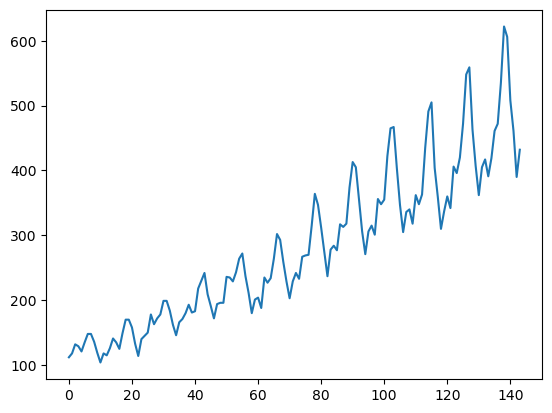

In [8]:
#Lets plot the data
plt.plot(data)
plt.show()

In [9]:
#Scaling process the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [10]:
#Train, Test split
len(data)

144

In [11]:
#Train -> 100, Test -> 44 data
train = data[0:100,:]
test = data[100:,:]

In [12]:
#Define a sunction to prepare the train and test datasets
def get_data(data, steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a=data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i + steps, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
steps = 2

In [14]:
#Making the datasets for both training and testing
#Input(X), Output(y)
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [15]:
#Reshaping the sets for using LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [16]:
#Create the model
model = Sequential()
model.add(LSTM(128, input_shape=(1, steps)))
model.add(Dense(64))
model.add(Dense(1)) #Output layer
model.compile(loss='mean_squared_error', optimizer='adam')

/Users/halil/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
#Look at the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,393 (294.50 KB)

 Trainable params: 75,393 (294.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Train the model
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0116
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 
Epoch 9/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 10/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 11/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 
Epoch 12/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 13/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 14/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 
Epoch 15/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 16/25


In [19]:
#Make predictions
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


In [20]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

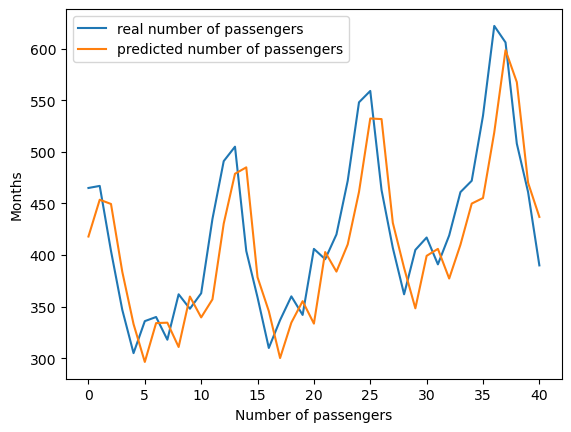

In [21]:
#Plot real number of passengers and predictions
plt.plot(y_test, label='real number of passengers')
plt.plot(y_pred, label='predicted number of passengers')
plt.ylabel('Months')
plt.xlabel('Number of passengers')
plt.legend()
plt.show()